# Model of genetic evolution

In [1]:
import numpy as np
import random as rd

from ripser import ripser
from persim import plot_diagrams
import subprocess
import re

## Function for point mutations
inputs:  
word = word to mutate (string)  

outputs:  
mutation = mutated word (string)

In [2]:
def point_mutation(word):
    
    if not set(word).issubset(('A','C','G','T')):
        return 'wrong alphabet'
    
    alphabet = ['A','C','G','T']
        
    pos = rd.randint(0,len(word)-1)
    letter_index = alphabet.index(word[pos])
    shift = rd.randint(1,3)
    mutation = word[:pos] + alphabet[(letter_index+shift) % 4] + word[pos+1:]
    
    return mutation

In [3]:
def point_mutation_ish(word):
    
    if not set(word).issubset(('A','C','G','T')):
        return 'wrong alphabet'
    
    if 'A' not in set(word):
        return word
    
    alphabet = ['A','C','G','T']
    letter = ''

    while letter != 'A':
        pos = rd.randint(0,len(word)-1)
        letter = word[pos]

    letter_index = alphabet.index(letter)
    shift = rd.randint(1,3)
    mutation = word[:pos] + alphabet[(letter_index+shift) % 4] + word[pos+1:]
    
    return mutation

In [4]:
point_mutation_ish('CCCCCCCC')

'CCCCCCCC'

## Function for recombinations
inputs:  
word_1 = 1st word to recombine (string)  
word_2 = 2nd word to recombine (string)  
r = length of replacement (int)  

outputs:  
mutation = mutated word (string)  

In [5]:
def recombination(word_1, word_2, r):
    
    if not set(word_1).issubset(('A','C','G','T')) or not set(word_2).issubset(('A','C','G','T')):
        return 'wrong alphabet'
    
    l_1 = len(word_1)
    l_2 = len(word_2)
    
    if l_1 != l_2:
        return 'words do not have same length'
    
    if r > l_1:
        return 'replacement length too long'
    
    swap = rd.randint(0,1)
    start = rd.randint(0,l_1-r)
    end = start + r
    
    if swap == 1:
        word_1, word_2 = word_2, word_1
        
    mutation = word_1[:start] + word_2[start:end] + word_1[end:]
    
    return mutation

## Function for evolution
inputs:  
start = starting word (string)   
num_gen = number of generations (int)  
max_pm = maximum number of mutations per word (int) 
prob_recom = propability for recombination of 2 words (float)  
r = length of replacement (int)

outputs:  
evol = evolved words (dictionary) - keys: (generation, starting word) / values: list of mutateted words  
wordlist = list of generated words (list)

In [6]:
def evolution(start, num_gen, max_pm, prob_recom, r):
    
    evol = {}
    evol[(0,start)] = [start]
    starts = [start]
    
    for gen in range(num_gen):
        newstarts = []
        n = len(starts)
        
        counter = 0
        
        for i in range(n):
                
            for j in range(i):
                rec = np.random.binomial(1,prob_recom)
                    
                if rec == 1:
                    counter += 1
                    word_1 = starts[i]
                    word_2 = starts[j]
                        
                    mutation = recombination(word_1, word_2, r)
                    evol[(gen+1, word_1, word_2)] = [mutation]
                    newstarts.append(mutation)
                    
        print('recombinations in Generation {}: {}'.format(gen+1, counter))
        print()
        
        for word in starts:
            
            if n == 1:
                num_mut = 3
            
            else:
                num_mut = rd.randint(0,max_pm)
            
            if num_mut == 0:
                mutated = [word]
            
            else:
                mutated = [word]
            
                for i in range(num_mut):
                    mutation = point_mutation_ish(word)
                    mutated.append(mutation)
                
            evol[(gen+1, word)] = mutated
            newstarts.extend(mutated)
            
        newstarts = list(set(newstarts))
        starts = newstarts
    
    wordlist = list(set([item for mutated in list(evol.values()) for item in mutated]))
            
    return evol, wordlist

num_gen = number of generations    
max_pm = maximum number of point mutations per word  
prob_recom = propability for recombination of 2 words  
l = length of words  
r = length of recombinations

In [7]:
num_gen = 19
max_pm = 1
prob_recom = 0.000005
l = 100
r = int(l/2)

In [8]:
start = l*'A'
print(start)

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


In [9]:
evol, wordlist = evolution(start, num_gen, max_pm, prob_recom, r)

recombinations in Generation 1: 0

recombinations in Generation 2: 0

recombinations in Generation 3: 0

recombinations in Generation 4: 0

recombinations in Generation 5: 0

recombinations in Generation 6: 0

recombinations in Generation 7: 0

recombinations in Generation 8: 0

recombinations in Generation 9: 0

recombinations in Generation 10: 0

recombinations in Generation 11: 0

recombinations in Generation 12: 0

recombinations in Generation 13: 0

recombinations in Generation 14: 2

recombinations in Generation 15: 3

recombinations in Generation 16: 7

recombinations in Generation 17: 7

recombinations in Generation 18: 15

recombinations in Generation 19: 42



In [10]:
evol

{(0,
  'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'): ['AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'],
 (1,
  'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'): ['AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA',
  'AAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA',
  'AAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA',
  'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'],
 (2,
  'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'): ['AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'],
 (2,
  'AAAAAAAAAAAAAAAAAAAA

In [11]:
wordlist

['AAAAACAACAAAAAAAAAAACAAAATATAAAAACAAAAAAAAAAAAAAAAAAAAAAAAGCAAAAAAAAAAAAAAAAAAAAAAAATAAAAAAAAAAAAAAA',
 'AATAAAAAAAAAAAAAAAAAAGAATTAACAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAGAAAAAAAAAAAA',
 'AAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAGAAAACCAGAAAATCAAAAAAAAAATAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAATAATAA',
 'AAAAAAAACAAAAAAAAAAAAACAAAAAAAAAGTAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGGAAG',
 'ACAAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAATAAACAACAAAAAAAAAAAAAAAAAAAAAAA',
 'AAAAAAAAAAAAAAAAAAAAAAAAACAAACAAGAAGAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAA',
 'AAAAAAAAAAAGAACGAAAAAAAAGAAACAAAACAAAAAAAAAAAAAAAAAAAGAAAAATAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATCAAAAAAAA',
 'AATAAAAAAAAAAAAAAATAAAAAAAATAAAAAAAAAAAAAAAAACAAAAAAAAAAATAAAAAAAAAAATAAAAAAGAAAAAAAAAAAAAAAAAACAAAA',
 'ACAAAAAAAGGAAAAAAAAAAAAAAAAATAAAAAAAAACCAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAAAACAAAGAAAAAAAAAAAAAAAAAAAAAA',
 'AAAAACAAAAAAAAAAAAAACTAAAAAAAAAAAAAAAAAAAGAAAAATAAAAA

n = #words

In [12]:
n = len(wordlist)
print(n)

6756


## Save evolution and wordlist to text file

In [13]:
with open('evol.txt', 'w') as f:
    print(evol, file=f)
    
with open('wordlist.txt', 'w') as f:
    print(wordlist, file=f)

## Implement Hamming-Distance

In [14]:
def dist(x,y):
    
    if len(x) != len(y):
        d = 'error'
        
    else:
        d = 0
    
        for i in range(len(x)):
            
            if x[i] != y[i]:
                d += 1
    
    return d

## Calculate distance matrix D

In [15]:
D = np.zeros((n,n))

for i in range(n):
    
    for j in range(i):
        D[i,j] = dist(wordlist[i],wordlist[j])

D = D+D.T

np.savetxt("dm_words.csv", D, delimiter=",")

## Calculate persistent homology

In [16]:
ph = ripser(D, distance_matrix=True, maxdim=1)

## Print persistent intervals in dim 1

In [17]:
pi = ph['dgms']
print(pi[1])

[[ 8. 10.]
 [ 7.  8.]
 [ 7.  8.]
 [ 6.  7.]
 [ 6.  7.]
 [ 5.  7.]
 [ 5.  6.]
 [ 5.  6.]
 [ 5.  6.]
 [ 5.  7.]
 [ 5.  6.]
 [ 5.  6.]
 [ 4.  5.]
 [ 4.  5.]
 [ 4.  5.]
 [ 4.  5.]
 [ 4.  5.]
 [ 4.  5.]
 [ 4.  5.]
 [ 3.  4.]
 [ 3.  4.]
 [ 3.  4.]
 [ 3.  4.]
 [ 3.  4.]
 [ 3.  4.]
 [ 3.  4.]
 [ 3.  4.]
 [ 3.  4.]
 [ 3.  4.]
 [ 3.  4.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 2.  3.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]
 [ 1.  2.]

## Plot persistent intervals

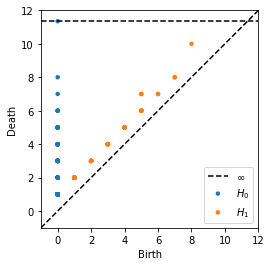

In [18]:
plot_diagrams(pi, show=True)

## Function to calculate representative cycles  
inputs: dm_text = distance matrix text file (string)  
outputs: representative_cycles (dictionary) - keys: enumeration of 1-cycle (int) / values: (list of edges, persistent interval) (tupel)

In [19]:
def representative_cycles(dm_text):
    
    with open('ripser_localization.txt', 'w') as file:
        subprocess.run(['./ripser-representatives', dm_text], stdout=file)
        
    file = open('ripser_localization.txt')
    lines = file.read().splitlines()
    file.close()
    
    starting_lines = []

    for i in range(len(lines)):
        
        if 'persistence intervals' in lines[i]:
            starting_lines.append(i)
        
    representative_cycles = {}
    num = 1
    
    for i in range(starting_lines[-1]+1,len(lines)):
        item = lines[i]
        split = item.split(':  ')
        interval = split[0][2:-1]
        interval = tuple(map(float, interval.split(',')))
        edges = split[1].split(', ')
        
        for j in range(len(edges)):
            match = re.search(r'\[(.+)\]', edges[j])
            
            if match:
                edges[j] = match.group(0)[1:-1]
                edges[j] = tuple(map(int,edges[j].split(',')))
        
        representative_cycles[num] = (edges,interval)
        num += 1
        
    return representative_cycles

In [20]:
rc = representative_cycles('dm_words.csv')

In [21]:
rc

{1: ([(1876, 4154), (4154, 4471), (1876, 6748), (4471, 6748)], (1.0, 2.0)),
 2: ([(492, 2412), (1074, 2412), (1074, 5960), (492, 6745), (5960, 6745)],
  (1.0, 2.0)),
 3: ([(2082, 3981), (2082, 6439), (3981, 6731), (6439, 6731)], (1.0, 2.0)),
 4: ([(754, 4524), (754, 5560), (4524, 6695), (5560, 6695)], (1.0, 2.0)),
 5: ([(1797, 3780), (1797, 3781), (3780, 6692), (3781, 6692)], (1.0, 2.0)),
 6: ([(1727, 3767), (1727, 5623), (3767, 6686), (5623, 6686)], (1.0, 2.0)),
 7: ([(141, 2734), (141, 6056), (2734, 6645), (6056, 6645)], (1.0, 2.0)),
 8: ([(992, 6349), (4234, 6349), (992, 6633), (4234, 6633)], (1.0, 2.0)),
 9: ([(2336, 5093), (2336, 5338), (5093, 6620), (5338, 6620)], (1.0, 2.0)),
 10: ([(2459, 4500), (4500, 4986), (2459, 6618), (4986, 6618)], (1.0, 2.0)),
 11: ([(635, 5840), (635, 6108), (5840, 6138), (6108, 6138)], (1.0, 2.0)),
 12: ([(3395, 3568), (3395, 3968), (3568, 6512), (3968, 6512)], (1.0, 2.0)),
 13: ([(1387, 6316), (4235, 6316), (1387, 6493), (4235, 6493)], (1.0, 2.0)),
 1

## Find words representing the cycles

In [22]:
for i in list(rc.keys()):
    print('{}. cycle:'.format(i))
    
    for edge in rc[i][0]:
        print(wordlist[edge[0]], wordlist[edge[1]])
        
    print()

1. cycle:
AAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAACAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAATAAAAAAAAAAAAAAACAAAGTAAAAAAA AAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAACAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAATAAAAAAAAAAAAAAACAAAATAAAAAAA
AAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAACAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAATAAAAAAAAAAAAAAACAAAATAAAAAAA AAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAACAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAATAAAAAAA
AAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAACAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAATAAAAAAAAAAAAAAACAAAGTAAAAAAA AAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAACAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAGTAAAAAAA
AAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAACAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAATAAAAAAA AAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAACAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAACAAAGTAAAAAAA

2. cycle:
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATAAAAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

AAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAGAAAACAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAGAAAACAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATAAAAAAAAAAAA

104. cycle:
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAACAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAGAAGAAAAAAAAAAAAAAATAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAGAAAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAGAAAAAAAAAAAAAAATAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAACAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAGAAGAAAAAAAAAAAAAAATAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAGAAAACAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA